# Visualizing FGSM attacks on binned histone modification data
Specifically attacked AttentiveChrome, but these inputs are used for both DeepChrome, DeepDiffChrome, and many other deep learning models in genomics.

In [1]:
import numpy as np
import os
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker

SMALL_SIZE = 30
MEDIUM_SIZE = 35
BIGGER_SIZE = 40

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Load saved data
Load a dataframe where 100 consecutive rows are the same GeneID (TODO: convert from float to int) as there are 100 bins per histone modification (HM) per gene. The 5 "O" columns are the original input data, the "A" columns are the adversarially generated (+/- 1) inputs, the "e" columns are the steps taken (epsilon) for those columns (TODO: these don't show bins that are lower bounded @ 0, maybe we want to change this to show how many get lower bounded?), and finally the "g" column is the gradient for each bin.

In [2]:
CELL_LINE = 'E016'

vis_output = np.load('./Results_all_fgsm/' + CELL_LINE + 'vis_output.npy')
COLS = (['GeneID',
         'O1','O2','O3','O4','O5',
         'A1','A2','A3','A4','A5',
         'e1','e2','e3','e4','e5',
         'g1','g2','g3','g4','g5',
         'ao1', 'ao2', 'ao3', 'ao4', 'ao5',
         'a1','a2','a3','a4','a5',
         'y','yho','yha',
        ])

df = pd.DataFrame(vis_output, columns=COLS)

print(len(df[df['y'] == 0.0])/len(df)*100, '% Labels 0')
print('Original predictions max:', np.round(max(df['yho']),3), ' min:', np.round(min(df['yho']), 3), ' avg:', np.round(np.mean(df['yho']), 3))
print('Attacked predictions max:', np.round(max(df['yha']),3), ' min:', np.round(min(df['yha']), 3), ' avg:', np.round(np.mean(df['yha']), 3))

df.head()

79.65151515151516 % Labels 0
Original predictions max: 0.536  min: 0.031  avg: 0.252
Attacked predictions max: 0.531  min: 0.038  avg: 0.294


,GeneID,O1,O2,O3,O4,O5,A1,A2,A3,A4,...,ao4,ao5,a1,a2,a3,a4,a5,y,yho,yha
0,172936.0,1.0,8.0,3.0,6.0,0.0,0.0,7.0,4.0,7.0,...,0.010136,0.010193,0.010382,0.010357,0.010232,0.010198,0.010194,0.0,0.507326,0.524247
1,172936.0,2.0,11.0,2.0,2.0,1.0,1.0,10.0,3.0,3.0,...,0.010143,0.010123,0.010210,0.010268,0.010196,0.010191,0.010198,0.0,0.507326,0.524247
2,172936.0,0.0,11.0,1.0,4.0,1.0,0.0,10.0,2.0,3.0,...,0.010164,0.010115,0.010209,0.010218,0.010223,0.010226,0.010224,0.0,0.507326,0.524247
3,172936.0,0.0,10.0,4.0,2.0,0.0,0.0,9.0,5.0,1.0,...,0.010075,0.010083,0.010218,0.010208,0.010194,0.010179,0.010170,0.0,0.507326,0.524247
4,172936.0,1.0,10.0,3.0,2.0,0.0,0.0,9.0,4.0,1.0,...,0.010042,0.009848,0.010205,0.010109,0.010142,0.010098,0.010019,0.0,0.507326,0.524247


Let's try find flipped labels:

In [3]:
df_0_to_1 = df[df['yho'] < 0.5][df[df['yho'] < 0.5]['yha'] > 0.5]

print(len(df_0_to_1)/100, 'genes flipped from 0 to 1')
print('Original predictions max:', np.round(max(df_0_to_1['yho']),3), ' min:', np.round(min(df_0_to_1['yho']), 3), ' avg:', np.round(np.mean(df_0_to_1['yho']), 3))
print('Attacked predictions max:', np.round(max(df_0_to_1['yha']),3), ' min:', np.round(min(df_0_to_1['yha']), 3), ' avg:', np.round(np.mean(df_0_to_1['yha']), 3))

df_0_to_1.head()

529.0 genes flipped from 0 to 1
Original predictions max: 0.5  min: 0.338  avg: 0.482
Attacked predictions max: 0.529  min: 0.5  avg: 0.511


,GeneID,O1,O2,O3,O4,O5,A1,A2,A3,A4,...,ao4,ao5,a1,a2,a3,a4,a5,y,yho,yha
200,172939.0,2.0,2.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,...,0.010124,0.010135,0.010270,0.010113,0.010060,0.010041,0.010036,0.0,0.485888,0.517726
201,172939.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.010094,0.010125,0.010035,0.010034,0.010032,0.010029,0.010035,0.0,0.485888,0.517726
202,172939.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.009930,0.009932,0.010062,0.010198,0.010060,0.009952,0.009949,0.0,0.485888,0.517726
203,172939.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.010113,0.010127,0.009972,0.009998,0.010022,0.010039,0.010051,0.0,0.485888,0.517726
204,172939.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.010183,0.010147,0.010058,0.010061,0.010059,0.010054,0.010046,0.0,0.485888,0.517726


In [4]:
df_1_to_0 = df[df['yho'] > 0.5][df[df['yho'] > 0.5]['yha'] < 0.5]

print(len(df_1_to_0)/100, 'genes flipped from 1 to 0')
if (len(df_1_to_0) > 0):
    print('Original predictions max:', np.round(max(df_1_to_0['yho']),3), ' min:', np.round(min(df_1_to_0['yho']), 3), ' avg:', np.round(np.mean(df_1_to_0['yho']), 3))
    print('Attacked predictions max:', np.round(max(df_1_to_0['yha']),3), ' min:', np.round(min(df_1_to_0['yha']), 3), ' avg:', np.round(np.mean(df_1_to_0['yha']), 3))
df_1_to_0.head()    

324.0 genes flipped from 1 to 0
Original predictions max: 0.519  min: 0.5  avg: 0.507
Attacked predictions max: 0.495  min: 0.386  avg: 0.476


,GeneID,O1,O2,O3,O4,O5,A1,A2,A3,A4,...,ao4,ao5,a1,a2,a3,a4,a5,y,yho,yha
3100,173113.0,0.0,2.0,2.0,2.0,0.0,1.0,3.0,1.0,1.0,...,0.010332,0.010078,0.010578,0.010595,0.010516,0.010652,0.010288,1.0,0.503295,0.474814
3101,173113.0,1.0,1.0,1.0,2.0,0.0,2.0,2.0,0.0,1.0,...,0.009902,0.010031,0.009967,0.009771,0.009780,0.009854,0.010013,1.0,0.503295,0.474814
3102,173113.0,1.0,3.0,1.0,6.0,0.0,2.0,4.0,0.0,7.0,...,0.010031,0.010050,0.010023,0.009939,0.010038,0.009951,0.009976,1.0,0.503295,0.474814
3103,173113.0,3.0,3.0,0.0,6.0,0.0,4.0,4.0,0.0,7.0,...,0.010117,0.010113,0.010014,0.010049,0.010076,0.010093,0.010102,1.0,0.503295,0.474814
3104,173113.0,2.0,5.0,1.0,0.0,0.0,3.0,6.0,0.0,1.0,...,0.010204,0.010272,0.010108,0.010119,0.010153,0.010287,0.010375,1.0,0.503295,0.474814


Now lets load attack and original beta attention maps as well (saved to a txt file):

In [5]:
beta_df = pd.read_csv('./Results_all_fgsm/' + CELL_LINE + '/' + CELL_LINE + '_attchrome/beta_attention.txt', header=None, index_col=0)
beta_df.head()

,1,2,3,4,5
0,,,,,
172936,0.184352,0.190513,0.161704,0.189456,0.273975
172938,0.177028,0.163793,0.258059,0.298932,0.102188
172939,0.186330,0.184495,0.167178,0.193151,0.268846
172940,0.149303,0.146580,0.253059,0.336069,0.114989
172943,0.252331,0.281324,0.169053,0.161278,0.136014


In [6]:
orig_beta_df = pd.read_csv('./Results_all_fgsm/' + CELL_LINE + '/' + CELL_LINE + '_attchrome/orig_beta_attention.txt', header=None, index_col=0)
orig_beta_df.head()

,1,2,3,4,5
0,,,,,
172936,0.175867,0.184805,0.163562,0.190286,0.285480
172938,0.212034,0.239677,0.212872,0.247165,0.088252
172939,0.179735,0.175590,0.174327,0.193429,0.276920
172940,0.184056,0.171255,0.240928,0.297359,0.106402
172943,0.230620,0.255735,0.169447,0.184811,0.159387


### Plot all data in 1 fig

NOTES:
- it seems most of the bins are non-peaks, maybe thats why non-peak area attacks have a much larger effect - there are just more of them.
- as expected, the adversarial example looks identical - crazy how it performs so much worse.
- seems there is noticable, but very, very slight change in attention - corresponds to max peak region!
- it seems the FGSM attack just moves the confidence in direction away from the mean by small amounts --> all predictions that were originally close to the mean will flip and all incorrect predictions will become even more incorrect.

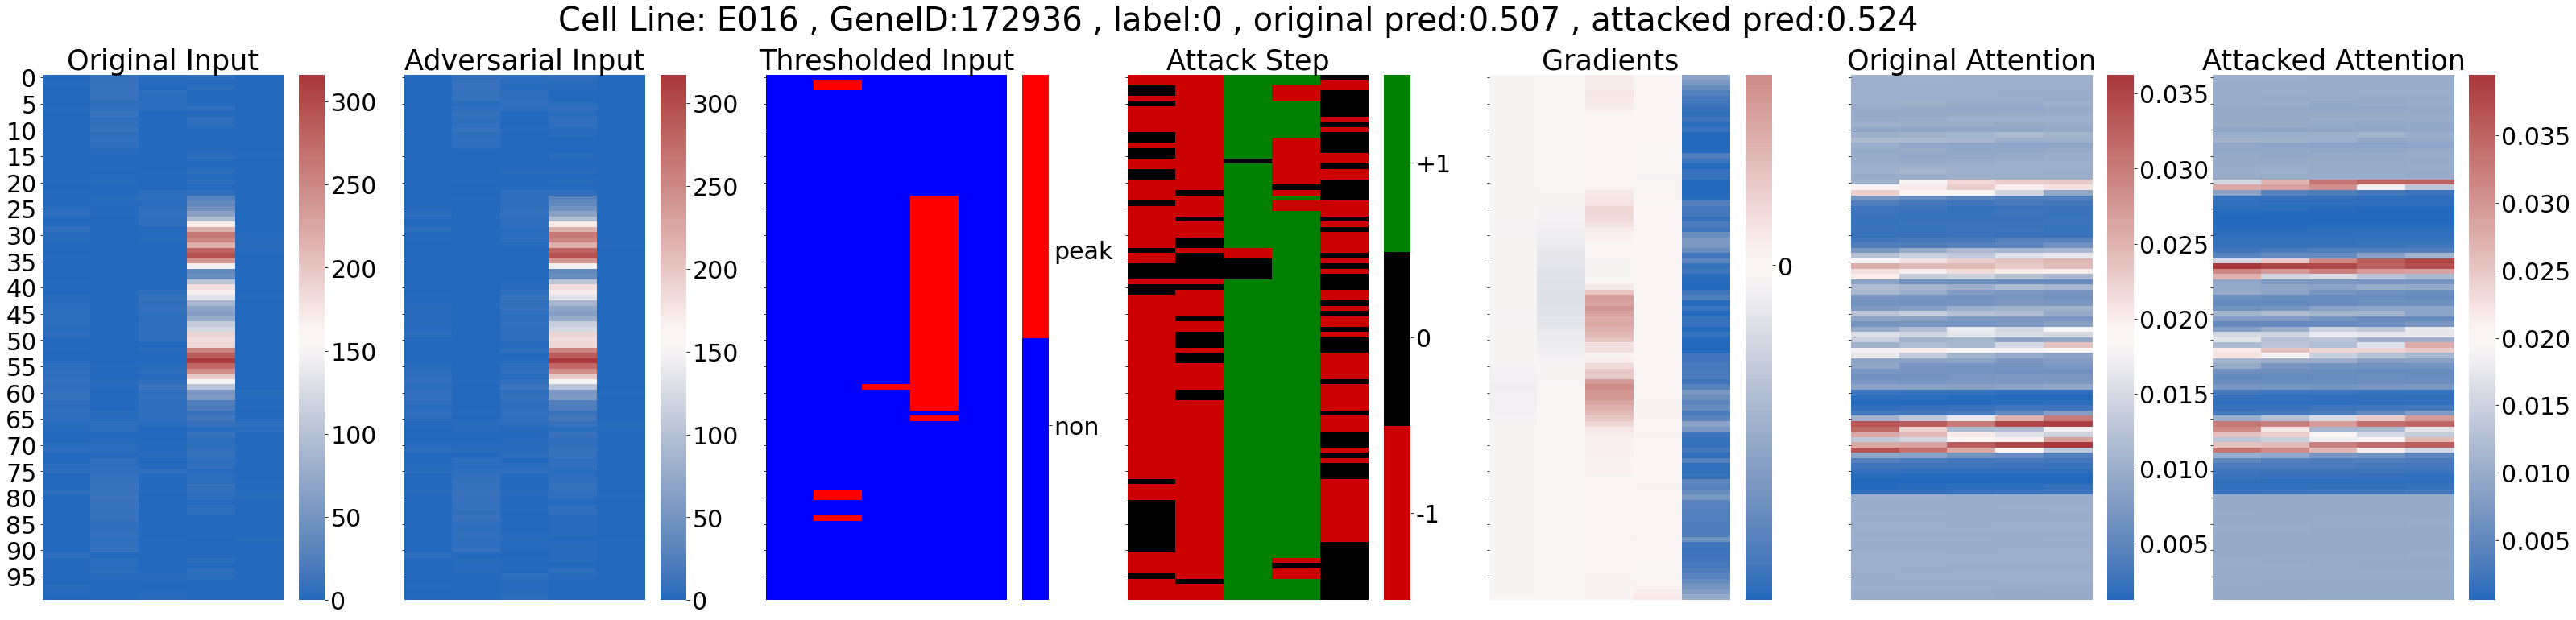

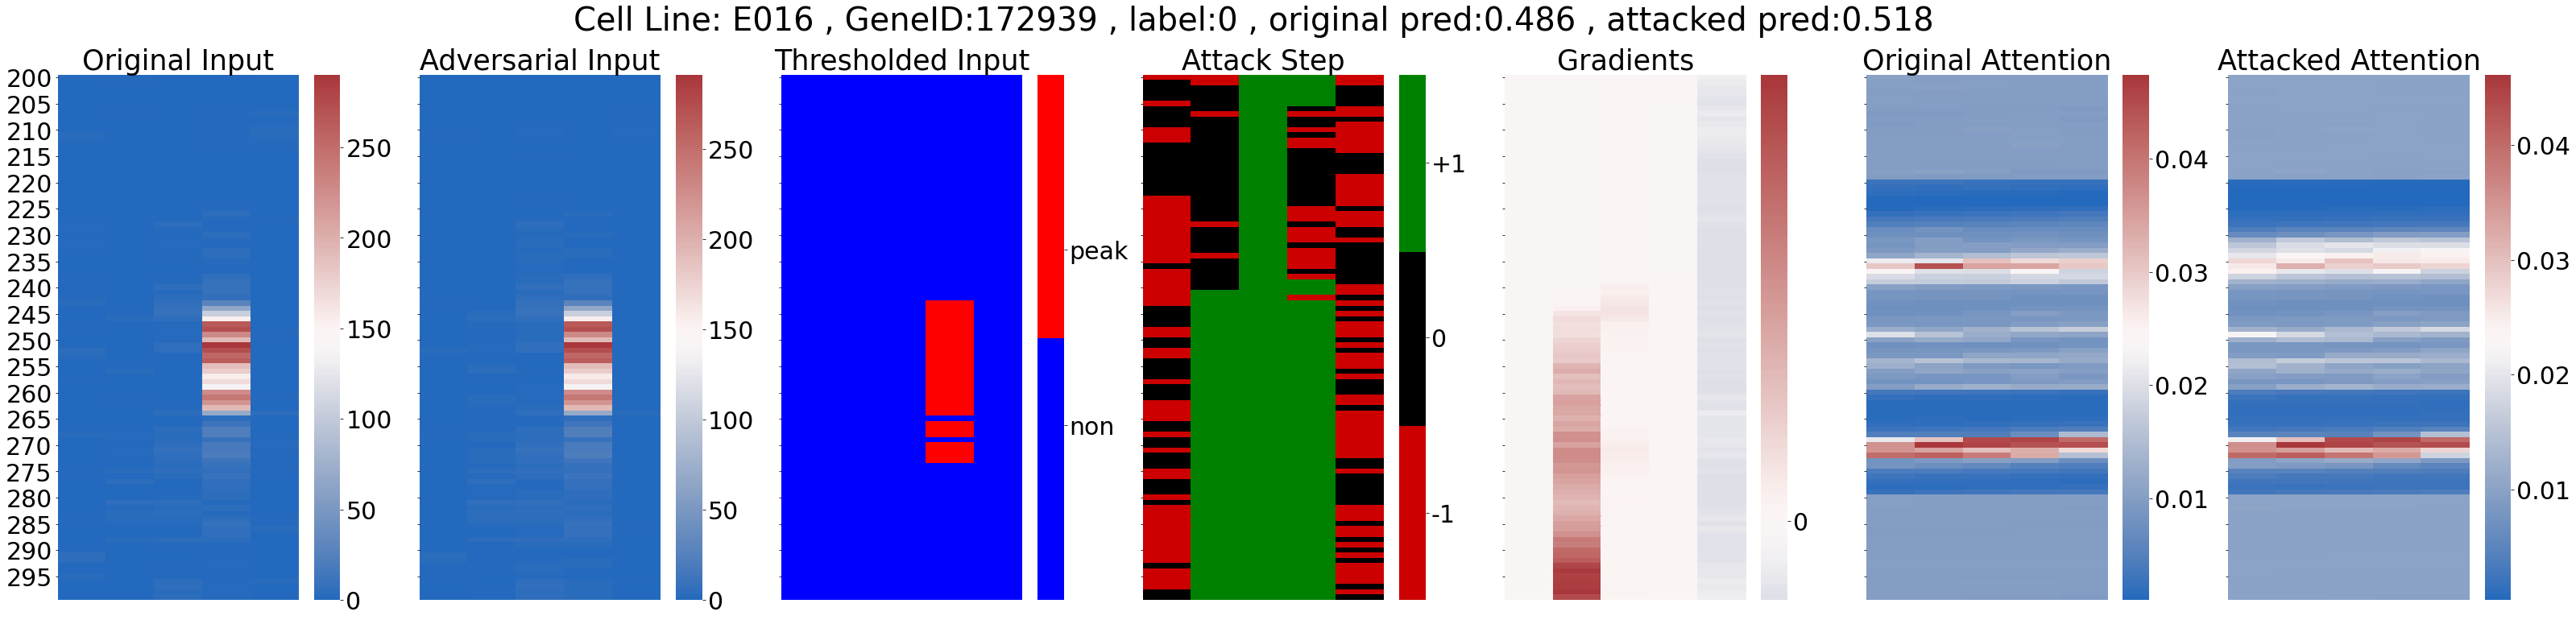

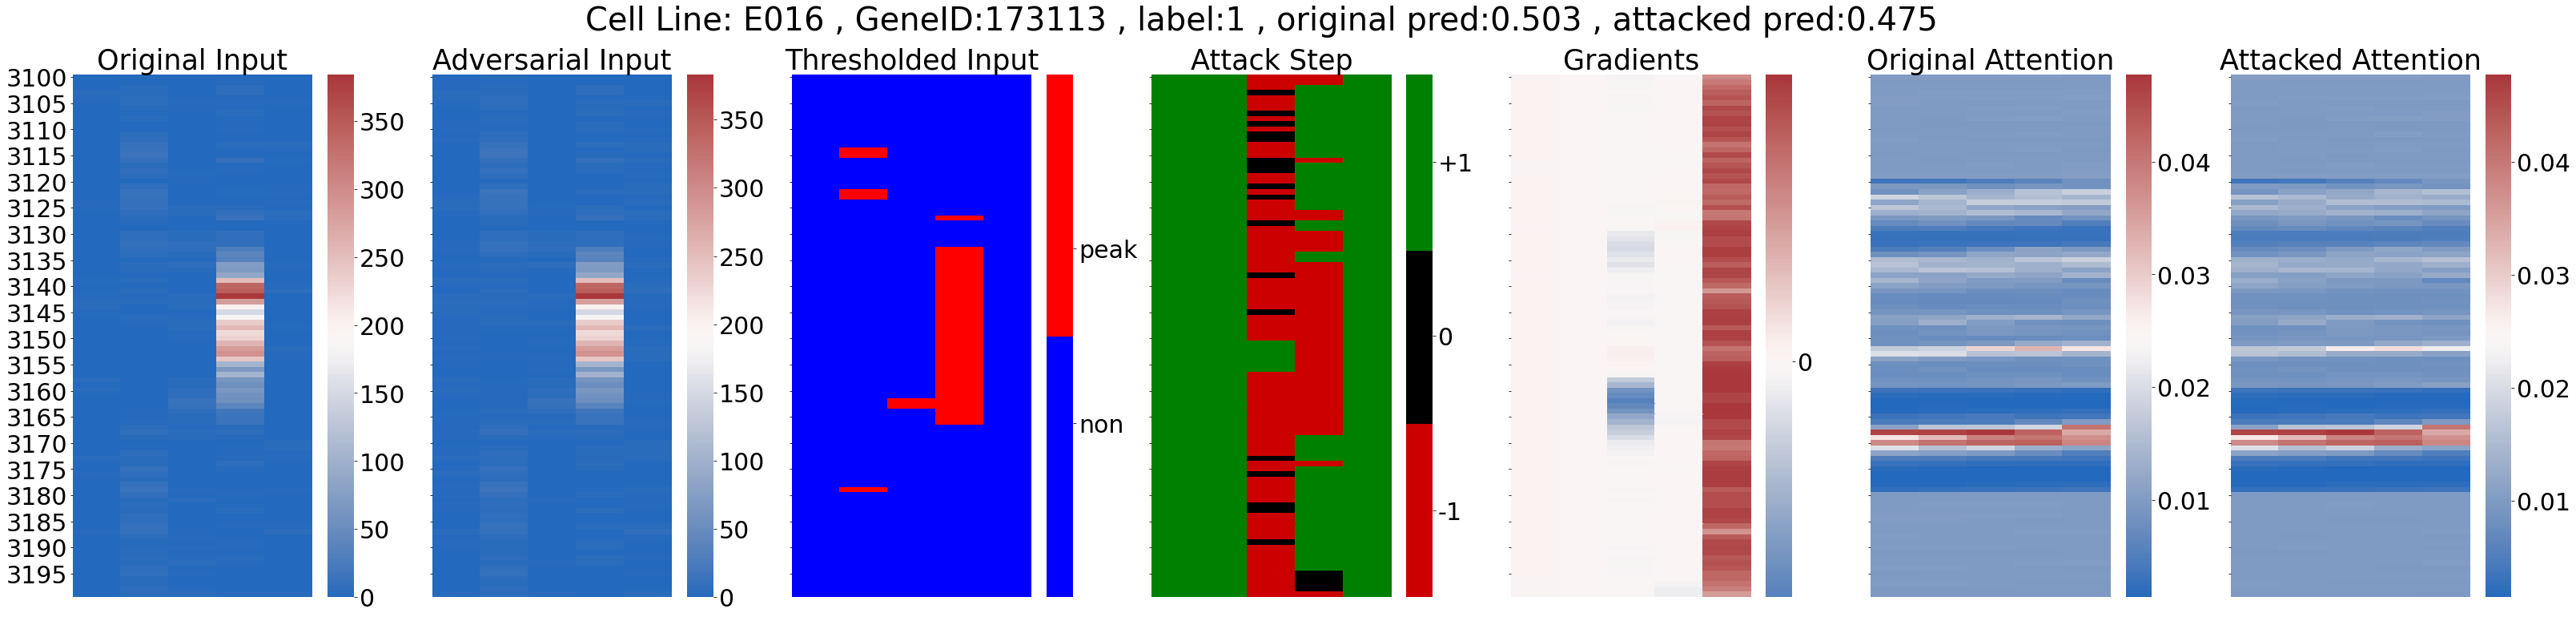

In [7]:
# CHOOSE WHICH GENE TO PLOT (number in range from 0-6599)
GENE_INDEXs = [0, 2, 31]

for GENE_INDEX in GENE_INDEXs:
    g_ind = GENE_INDEX*100

    fig, axes = plt.subplots(1, 7, sharey=True, figsize=(55,12))
    fig.suptitle('Cell Line: ' + CELL_LINE + ' , GeneID:' + str(int(df['GeneID'].iloc[g_ind])) + ' , label:' + str(int(df['y'].iloc[g_ind])) + ' , original pred:' + str(np.round(df['yho'].iloc[g_ind], 3)) + ' , attacked pred:' + str(np.round(df['yha'].iloc[g_ind], 3)))
    axes[0].set_title('Original Input')
    axes[1].set_title('Adversarial Input')
    axes[2].set_title('Thresholded Input')
    axes[3].set_title('Attack Step')
    axes[4].set_title('Gradients')
    axes[5].set_title('Original Attention')
    axes[6].set_title('Attacked Attention')
    axes[0].set_ylabel('Bins') # why isn't this showing up...

    myColors = ((0.8, 0.0, 0.0, 1.0), "black", "green")
    cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
    binary_cmap = LinearSegmentedColormap.from_list('Custom', ('blue','red'), 2)

    sns.heatmap(df[['O1','O2','O3','O4','O5']].iloc[g_ind:(g_ind+100)], cmap="vlag", xticklabels=False, ax=axes[0])
    sns.heatmap(df[['A1','A2','A3','A4','A5']].iloc[g_ind:(g_ind+100)], cmap="vlag", xticklabels=False, ax=axes[1])
    sns.heatmap(np.array(df[['O1','O2','O3','O4','O5']].iloc[g_ind:(g_ind+100)] > 10), cmap=binary_cmap, xticklabels=False, ax=axes[2])
    sns.heatmap(df[['e1','e2','e3','e4','e5']].iloc[g_ind:(g_ind+100)], cmap=cmap, center=0,xticklabels=False, ax=axes[3])
    sns.heatmap(df[['g1','g2','g3','g4','g5']].iloc[g_ind:(g_ind+100)], cmap="vlag", center=0, cbar_kws={"ticks":[0]}, xticklabels=False, ax=axes[4])
    sns.heatmap(df[['ao1', 'ao2', 'ao3', 'ao4', 'ao5']].iloc[g_ind:(g_ind+100)], cmap="vlag", xticklabels=False, ax=axes[5])
    sns.heatmap(df[['a1','a2','a3','a4','a5']].iloc[g_ind:(g_ind+100)], cmap="vlag", xticklabels=False, ax=axes[6])

    colorbar_binary = axes[2].collections[0].colorbar
    colorbar_binary.set_ticks([0.667, 0.333])
    colorbar_binary.set_ticklabels(['peak', 'non'])

    colorbar = axes[3].collections[0].colorbar
    colorbar.set_ticks([0.667, 0, -0.667])
    colorbar.set_ticklabels(['+1', '0', '-1'])


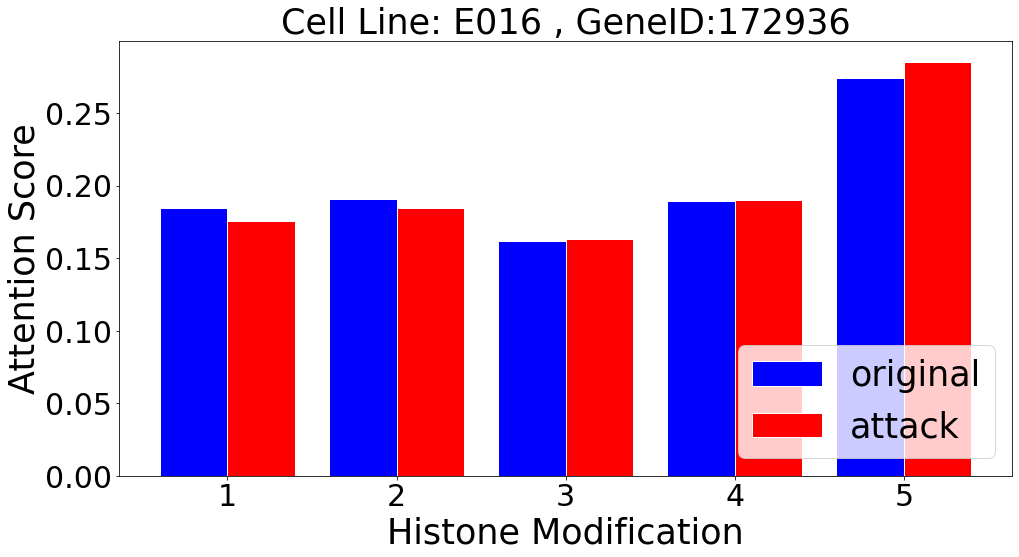

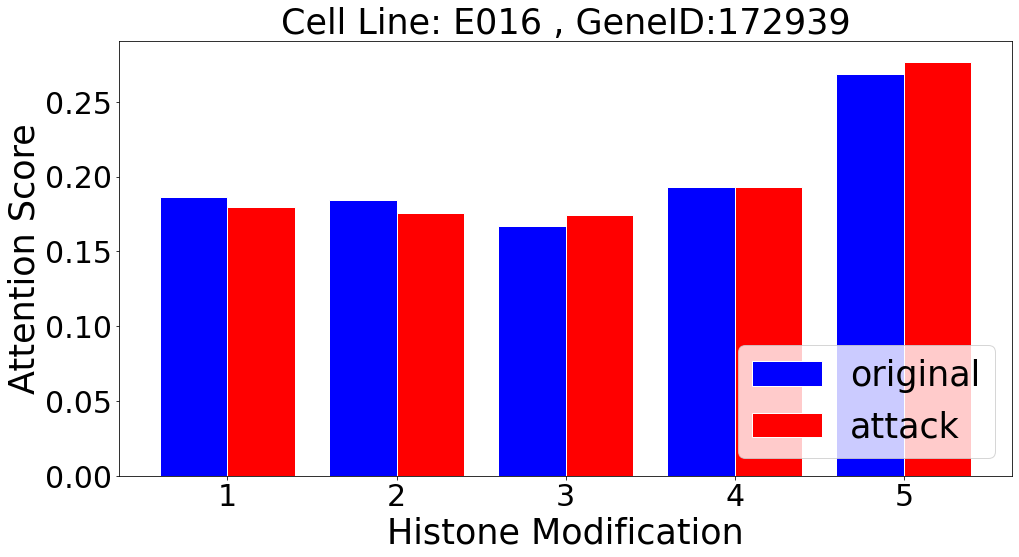

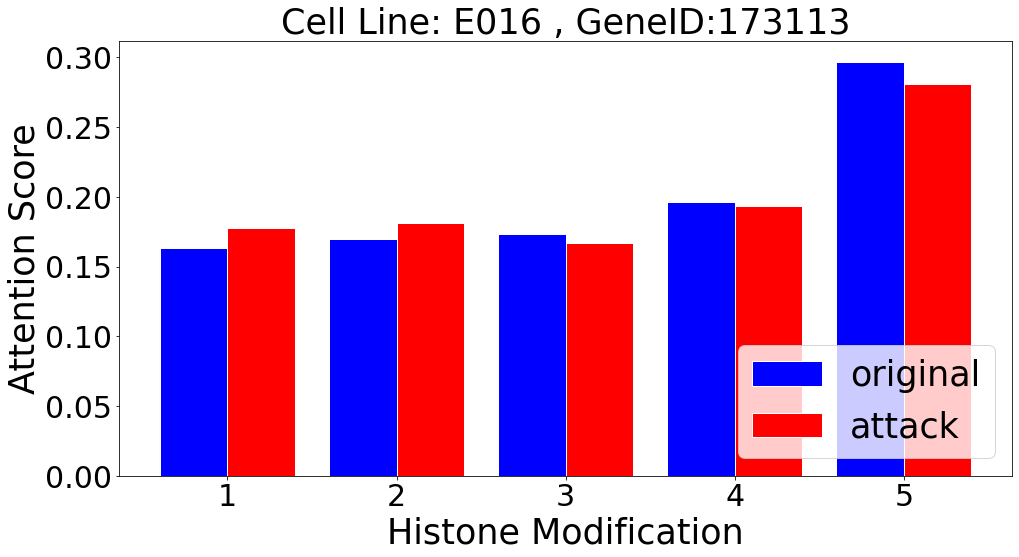

In [8]:
# CHOOSE WHICH GENE TO PLOT (number in range from 0-6599)
GENE_INDEXs = [0, 2, 31]

for GENE_INDEX in GENE_INDEXs:
    data = [beta_df.iloc[GENE_INDEX], orig_beta_df.iloc[GENE_INDEX]]
    barWidth = 0.60
    gap = 1.5
    plt.figure(figsize=(16, 8))
    colors = ['blue', 'red']
    labels = ['original', 'attack']
    for i, results in enumerate(data):
      r = np.arange(len(results)) * gap + i * barWidth
      plt.bar(r, results, color=colors[i], width=barWidth, edgecolor='white', label=labels[i], linewidth=[1 for _ in results])

    plt.title('Cell Line: ' + CELL_LINE + ' , GeneID:' + str(beta_df.index[GENE_INDEX]))
    plt.xlabel('Histone Modification')
    plt.ylabel('Attention Score')
    plt.xticks([r * gap + 1/len(data) * barWidth for r in range(len(results))], np.arange(1,6))
    plt.legend(loc='lower right')
    plt.show()